In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import winsound

In [3]:
# df = pd.read_csv("../Data/bank.csv", sep=";")
df = pd.read_csv("../Data/Cleaned/bank_cleaned.csv")
print(len(df))
print(len(df.columns))
df.head()

4521
43


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00,1,0,0,...,0,0,1,0,0,0,0,0,1,0


C:\Users\Kieron\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


(1) ['alpha = 1e-06', 0.89478337754199821]
(2) ['alpha = 1e-05', 0.8938992042440318]
(3) ['alpha = 0.0001', 0.89832007073386388]
(4) ['alpha = 0.001', 0.90274093722369586]
(5) ['alpha = 0.01', 0.90274093722369586]
(6) ['alpha = 0.1', 0.90804597701149425]
(7) ['alpha = 1.0', 0.905393457117595]
best score =  (6, 'alpha = 0.1', 0.90804597701149425)


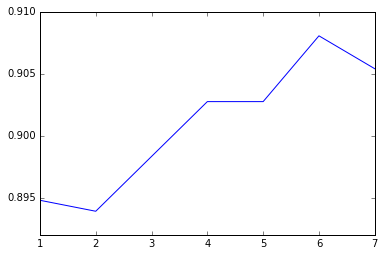

In [6]:
#     alphas = np.logspace(-5, 0, 100)
alphas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0]

names = []
for i in alphas:
    names.append('alpha = ' + str(i))

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i, random_state=1))

X = df.drop('y',axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y)#, test_size=.4)

i = 0
ilist = []
best_score = None
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    i+=1
    if best_score is None:
        best_score = i, name, score
    if score > best_score[2]:
        best_score = i, name, score


    ilist.append(i)
    print("(%s)"%(i), [name, score])
#         print("(%s)"%(i), name, "\t\t\t score = ", score)

    scores.append(score)

    # alpha = 1e-05 | score =  0.90450928382
    # alpha = 0.001 | score =  0.909814323607
    # alpha = 0.1 | score =  0.909814323607
    # alpha = 10.0 | score =  0.88240495137
    # alpha = 1000.0 | score =  0.88240495137
    
#     (1) ['alpha = 1e-06', 0.89213085764809907]
#     (2) ['alpha = 1e-05', 0.89213085764809907]
#     (3) ['alpha = 0.0001', 0.89036251105216624]
#     (4) ['alpha = 0.001', 0.89213085764809907]
#     (5) ['alpha = 0.01', 0.89124668435013266]
#     (6) ['alpha = 0.1', 0.90097259062776303]
#     (7) ['alpha = 1.0', 0.89920424403183019]
#     best score =  (6, 'alpha = 0.1', 0.90097259062776303)

print("best score = ", best_score)

plt.plot(ilist, scores)
plt.show()

winsound.Beep(300,300)
winsound.Beep(400,300)
winsound.Beep(300,300)

In [4]:
# alphas = np.logspace(-6, -1, 5)
# print(scores)
# print(alphas)
# plt.plot(alphas, scores, "x")
# plt.ylim(.88, .90)
# plt.xlim(min(alphas), max(alphas))
# plt.show()
# print(min(alphas))
# print(max(alphas))